# Market Prices time-series dataset released by OCHA

Link to the Market Prices data released by OCHA: https://data.humdata.org/ (World Food Programme (WFP) is the main source). We decide to download the data from OCHA website because they provide also the information about the 'food groups'.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ntpath
import glob
# Set a value for the column width layout.
pd.options.display.max_colwidth = 20
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from MapPlot.MapPlot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by OCHA regarding the market prices indicator stored in the 'wfp_data' folder.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

# Concatenate the data of the countries in an unique dataframe.
for filename in all_files:
    df = pd.read_csv(filename, header = 1)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

# Concatenate data.
df = pd.concat(dfs, axis = 0, ignore_index = True)
# Delete duplicate rows if exist.
df = df.drop_duplicates()
df.head()

,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,Unnamed: 10,#item+code,Unnamed: 12,Unnamed: 13,#item+type+code,#meta+id,Unnamed: 16,Country
0,2020-04-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
1,2020-05-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
2,2020-06-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
3,2020-07-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
4,2020-08-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso


In [5]:
# Rename some columns names.
df.rename(columns = {"#date": "Datetime", "#item+name": "Commodity", "#item+unit": "Unit", "#item+type": "Food Group", "#value": "Price", "#currency": "Currency", "#adm1+name": "AdminStrata"}, inplace = True)
# Select only some feature items.
df = df[["Datetime", "Commodity", "Unit", "Food Group", "Price", "Currency", "AdminStrata", "Country"]]
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2020-04-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso
1,2020-05-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso
2,2020-06-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso
3,2020-07-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso
4,2020-08-15,Rice (imported) ...,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso


The data have a monthly granularity. We convert the temporal information to an appropriate pandas datetime object selecting the data beyond a defined year in order to reduce the amount of data to analyze. The 15th of the month is used as a convention to indicate that the price is valid for the corresponding entire month.

In [6]:
# Creation of an accurate datetime format.
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,1992-01-15,Millet - Retail,KG,cereals and tubers,73.00,XOF,Sahel,Burkina Faso
1,1992-01-15,Millet - Retail,KG,cereals and tubers,70.25,XOF,Est,Burkina Faso
2,1992-01-15,Millet - Retail,KG,cereals and tubers,53.00,XOF,Boucle Du Mouhoun,Burkina Faso
3,1992-01-15,Millet - Retail,KG,cereals and tubers,75.75,XOF,Sahel,Burkina Faso
4,1992-01-15,Millet - Retail,KG,cereals and tubers,57.67,XOF,Sahel,Burkina Faso


In [7]:
# Select only the data beyond this year (the year is chosen based on the coverage of the FCG <= 2 survey).
year = 2018

In [8]:
df = df.loc[pd.DatetimeIndex(df.Datetime).year >= year]
df.reset_index(drop = True, inplace = True)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2018-01-15,"Meat (beef, minc...",KG,"meat, fish and eggs",3600.0,SYP,Al_Qunaytirah,Syria
1,2018-01-15,Sorghum - Retail,1.3 KG,cereals and tubers,450.0,NGN,Yobe,Nigeria
2,2018-01-15,Wheat - Wholesale,MT,cereals and tubers,138000.0,SYP,Al_Qunaytirah,Syria
3,2018-01-15,Rice (imported) ...,1.4 KG,cereals and tubers,1000.0,NGN,Yobe,Nigeria
4,2018-01-15,Sorghum (local) ...,100 KG,cereals and tubers,17500.0,XOF,Centre-nord,Burkina Faso


### Brief items description

In [9]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

Datetime       0
Commodity      0
Unit           0
Food Group     0
Price          0
Currency       0
AdminStrata    0
Country        0
dtype: int64

### Country item

In [10]:
print("The countries in the dataset are:", ", ".join(df.Country.unique()))

The countries in the dataset are: Syria, Nigeria, Burkina Faso, Yemen


### AdminStrata item

In [11]:
# Rename the name of some administrative regions of Burkina Faso.
df.replace(["Boucle Du Mouhoun", "Sud-ouest", "Plateau Central", "Centre-est", "Centre-ouest", "Centre-nord", "Centre-sud", "Hauts-bassins"], 
           ["Boucle-Du-Mouhoun", "Sud-Ouest", "Plateau-Central", "Centre-Est", "Centre-Ouest", "Centre-Nord", "Centre-Sud", "Hauts-Bassins"], inplace = True)

In [12]:
# Rename the name of some administrative regions of Syria.
df.replace(["As_Suweida", "Dara", "Damascus", "City_Damascus", "Hassakeh", "Raqqa", "Dayr_Az_Zor", "Al_Qunaytirah"], 
           ["As-Sweida", "Dar'a", "Rural Damascus", "Damascus", "Al-Hasakeh", "Ar-Raqqa", "Deir-ez-Zor", "Quneitra"], inplace = True)

In [13]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the administrative regions of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago.  The market prices dataframe has the values of 21 administrative regions (Socotra not included; more precisely, Socotra is considered into the Hadramaut administrative region. In fact, a market of Hadramaut administrative region is placed on Socotra island).

In [14]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(21,)


array(['Marib', 'Al Mahwit', 'Al Jawf', 'Abyan', 'Shabwah',
       'Amanat Al Asimah', 'Ibb', "Sa'ada", 'Hadramaut', 'Hajjah',
       'Raymah', 'Al Bayda', 'Aden', 'Al Maharah', 'Dhamar', "Al Dhale'e",
       'Lahj', 'Al Hudaydah', "Sana'a", 'Taizz', 'Amran'], dtype=object)

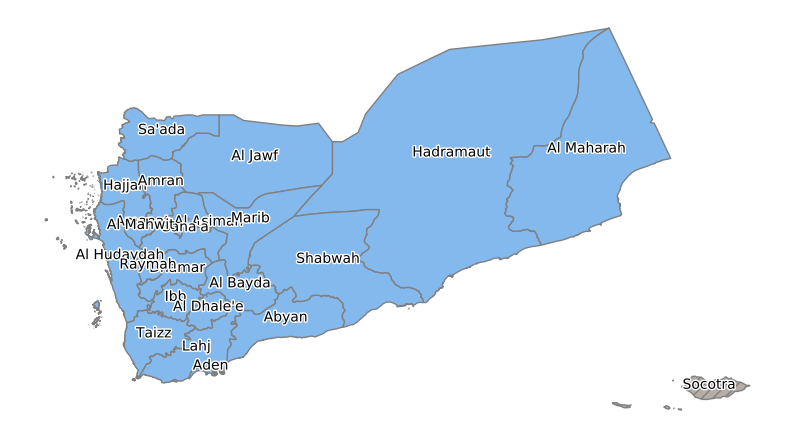

In [15]:
draw_adminstratas("Yemen", AdminStratas["Yemen"], AdminStratas["Yemen"], "../Shape Files/shapefiles/Yemen/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_marketprice_yemen.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 administrative regions. It also includes The Federal Capital Territory that is under the direct control of the federal government. The AdminStrata items of the market prices dataframe cover 13 administrative regions.

In [16]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(13,)


array(['Yobe', 'Kaduna', 'Borno', 'Jigawa', 'Zamfara', 'Gombe', 'Kano',
       'Lagos', 'Oyo', 'Katsina', 'Kebbi', 'Adamawa', 'Sokoto'],
      dtype=object)

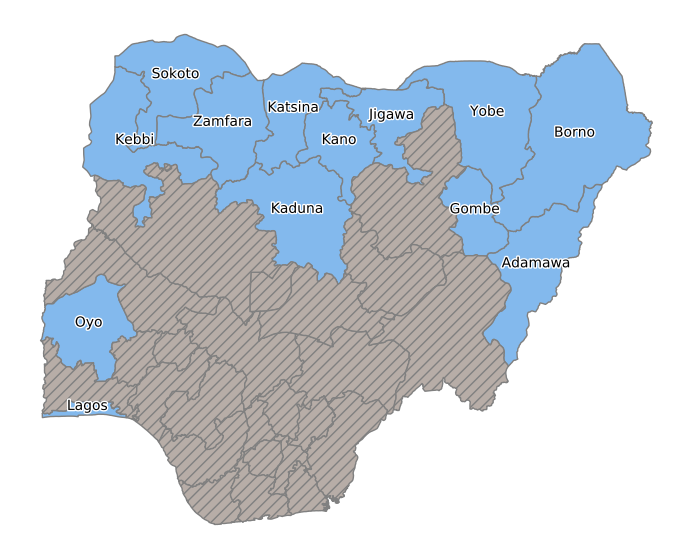

In [17]:
draw_adminstratas("Nigeria", AdminStratas["Nigeria"], AdminStratas["Nigeria"], "../Shape Files/shapefiles/Nigeria/administrative level 1", figsize = (10, 7), annotation = True, 
                  annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_marketprice_nigeria.png", dpi = 300)

- **Syria (SYR)**: the administrative regions of the Syria country are 14. The market prices dataframe has the values of all 14 administrative regions.

In [18]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Quneitra', 'Lattakia', 'Al-Hasakeh', 'Hama', 'Ar-Raqqa', 'Aleppo',
       'Rural Damascus', 'As-Sweida', 'Tartous', 'Damascus', "Dar'a",
       'Homs', 'Idleb', 'Deir-ez-Zor'], dtype=object)

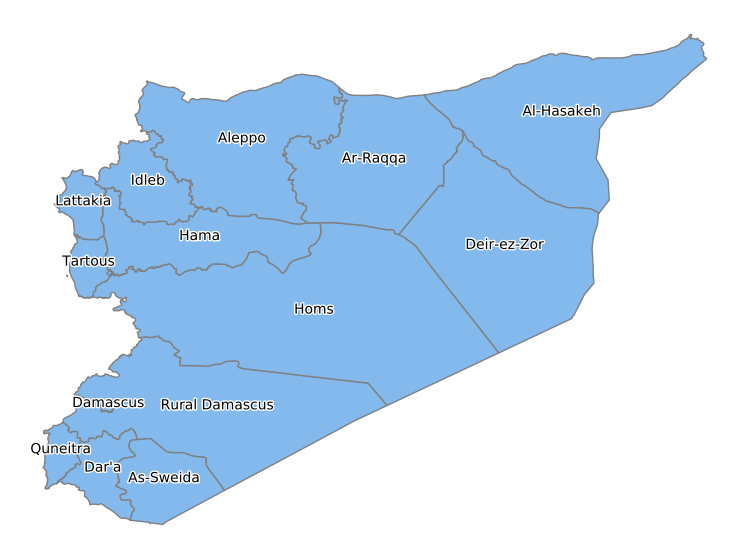

In [19]:
draw_adminstratas("Syria", AdminStratas["Syria"], AdminStratas["Syria"], "../Shape Files/shapefiles/Syria/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Syria/map_marketprice_syria.png", dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The market prices dataframe has the values of all 13 administrative regions.

In [20]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Centre-Nord', 'Plateau-Central', 'Nord', 'Hauts-Bassins',
       'Boucle-Du-Mouhoun', 'Centre', 'Centre-Est', 'Sahel', 'Sud-Ouest',
       'Centre-Ouest', 'Est', 'Cascades', 'Centre-Sud'], dtype=object)

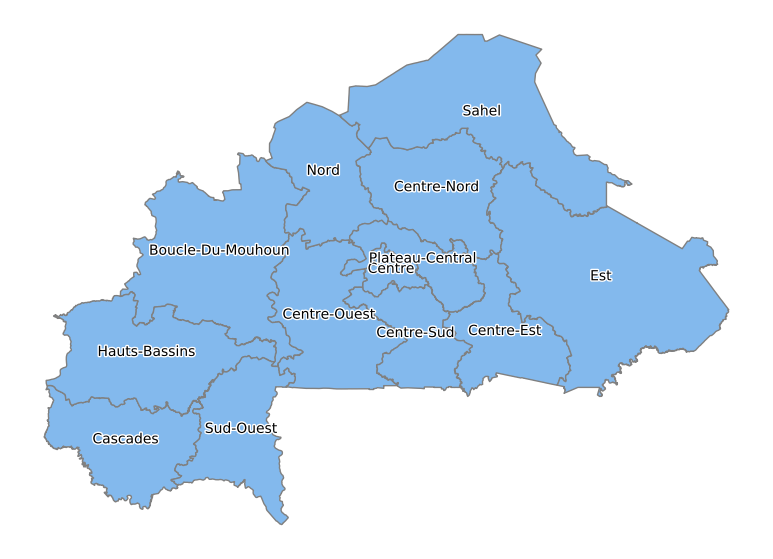

In [21]:
draw_adminstratas("Burkina Faso", AdminStratas["Burkina Faso"], AdminStratas["Burkina Faso"], "../Shape Files/shapefiles/Burkina Faso/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_marketprice_burkina.png", dpi = 300)

### Market prices preprocessing

In [22]:
print("The types of commodities:")
np.sort(df.Commodity.unique())

The types of commodities:


array(['Apples - Retail', 'Bananas - Retail',
       'Beans (kidney red) - Retail', 'Beans (niebe) - Retail',
       'Beans (red) - Retail', 'Beans (white) - Retail',
       'Bread (bakery) - Retail', 'Bread (shop) - Retail',
       'Bread - Retail', 'Bulgur - Retail', 'Bulgur - Wholesale',
       'Carrots - Retail', 'Cassava meal (gari, yellow) - Retail',
       'Cassava meal (gari, yellow) - Wholesale', 'Cheese - Retail',
       'Chickpeas - Retail', 'Cowpeas (brown) - Retail',
       'Cowpeas (brown) - Wholesale', 'Cowpeas (white) - Retail',
       'Cowpeas (white) - Wholesale', 'Cowpeas - Retail',
       'Cucumbers - Retail', 'Dates - Retail', 'Diapers - Retail',
       'Dishwashing liquid - Retail', 'Eggplants - Retail',
       'Eggs - Retail', 'Exchange rate (unofficial) - Retail',
       'Fish (sardine, canned) - Retail', 'Fish (tuna, canned) - Retail',
       'Fish - Retail', 'Fuel (diesel) - Retail',
       'Fuel (diesel, parallel market) - Retail', 'Fuel (gas) - Retail',
    

N.B. Not all the administrative regions have a time-series for all these commodities.

In [23]:
print("The types of food groups:")
np.sort(df["Food Group"].unique())

The types of food groups:


array(['cereals and tubers', 'meat, fish and eggs', 'milk and dairy',
       'miscellaneous food', 'non-food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits'], dtype=object)

We decide to keep and isolate the commodity 'Exchange rate (unofficial)' from the 'non-food' group and considering it as a new food group.

In [24]:
def select_non_food(group):
    if group.name == "non-food":
        # Keep the commodities about the exchange rate.
        group.loc[group.Commodity.str.contains("Exchange rate"), "Food Group"] = "Exchange rate"
        return group
    else:
        return group

df = df.groupby("Food Group", group_keys = False).apply(select_non_food)

In [25]:
# Select sub-dataframe considering only the 'Cereals and tubers' and the 'Exchange rate'.
df = df.loc[(df["Food Group"] == "Exchange rate") | (df["Food Group"] == "cereals and tubers")]
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
1,2018-01-15,Sorghum - Retail,1.3 KG,cereals and tubers,450.0,NGN,Yobe,Nigeria
2,2018-01-15,Wheat - Wholesale,MT,cereals and tubers,138000.0,SYP,Quneitra,Syria
3,2018-01-15,Rice (imported) ...,1.4 KG,cereals and tubers,1000.0,NGN,Yobe,Nigeria
4,2018-01-15,Sorghum (local) ...,100 KG,cereals and tubers,17500.0,XOF,Centre-Nord,Burkina Faso
6,2018-01-15,Wheat flour - Re...,KG,cereals and tubers,150.0,SYP,Quneitra,Syria


In [26]:
print("The types of food groups:")
df["Food Group"].unique()

The types of food groups:


array(['cereals and tubers', 'Exchange rate'], dtype=object)

In [27]:
print("The unit of measure of the commodities:")
df.Unit.unique()

The unit of measure of the commodities:


array(['1.3 KG', 'MT', '1.4 KG', '100 KG', 'KG', 'USD/LCU', '3.1 KG',
       '3.4 KG', 'Unit', '50 KG', '100 Tubers', 'Packet'], dtype=object)

In [28]:
# Check if some commodities are measured using multiple unit types among the countries.
commodities_units = dict()

def unit_check(group):
    if len(group.Unit.unique()) > 1:
        commodities_units[(group.Commodity.unique()[0], group.Country.unique()[0])] = list(group.Unit.unique())

df.groupby(["Country", "Commodity"]).apply(unit_check);
print(commodities_units)

{('Millet - Retail', 'Nigeria'): ['1.4 KG', 'KG'], ('Rice (imported) - Retail', 'Nigeria'): ['1.4 KG', 'KG'], ('Rice (local) - Retail', 'Nigeria'): ['1.4 KG', 'KG'], ('Rice (milled, local) - Wholesale', 'Nigeria'): ['50 KG', '100 KG'], ('Sorghum - Retail', 'Nigeria'): ['1.3 KG', '1.4 KG'], ('Yam - Retail', 'Nigeria'): ['3.1 KG', '3.4 KG', 'KG'], ('Yam - Wholesale', 'Nigeria'): ['100 KG', '100 Tubers']}


Convert all the commodities with multiple units to have a single unit and, when possible, the commodities with a single unit to have a smaller unit (as KG).

N.B. There is an ambiguous commodity with two unit types: *100 Tubers* and *100 KG* unit. Not knowing the conversion, we decide to delete the corresponding commodity for each adminstrata of the country of interest (Nigeria).

In [29]:
def adjust_unit(group):
    def conversion(row):
        unit = row.Unit.split()
        price = row.Price
        commodity = row.Commodity
        # Select the common unit of measure.     
        if unit[-1] == "KG":
            if len(unit) > 1:
                div = float(unit[0])
            else:
                div = 1
            unit = "KG"
            price = price / div
            return pd.Series([unit, price, commodity])       
        elif unit[-1] == "MT":
            if len(unit) > 1:
                div = float(unit[0]) * 1000
            else:
                div = 1000
            unit = "KG"
            price = price / div
            return pd.Series([unit, price, commodity])    
        else:
            return pd.Series([" ".join(unit), price, commodity])    

    group[["Unit", "Price", "Commodity"]] = group.apply(conversion, axis = 1)

    return group 

# Ignore the commodities with an unknown double unit.
df_adjust_unit = df[~((df.Commodity == "Yam - Wholesale") & (df.Country == "Nigeria"))]
# Adjust the unit of measure.
df_adjust_unit = df_adjust_unit.groupby(["Country", "Commodity"]).apply(adjust_unit)
df_adjust_unit.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
1,2018-01-15,Sorghum - Retail,KG,cereals and tubers,346.153846,NGN,Yobe,Nigeria
2,2018-01-15,Wheat - Wholesale,KG,cereals and tubers,138.000000,SYP,Quneitra,Syria
3,2018-01-15,Rice (imported) ...,KG,cereals and tubers,714.285714,NGN,Yobe,Nigeria
4,2018-01-15,Sorghum (local) ...,KG,cereals and tubers,175.000000,XOF,Centre-Nord,Burkina Faso
6,2018-01-15,Wheat flour - Re...,KG,cereals and tubers,150.000000,SYP,Quneitra,Syria


In [30]:
# Check if some commodities are still measured using different unit type.
commodities_units = dict()

df_adjust_unit.groupby(["Country", "Commodity"]).apply(unit_check);
print(commodities_units)

{}


In [31]:
# The unit of measure of the commodoties.
df_adjust_unit.Unit.unique()

array(['KG', 'USD/LCU', 'Unit', '100 Tubers', 'Packet'], dtype=object)

In [32]:
# Add a suffix to each commodity corresponding to the unit value.
def add_unit(row):
    commodity = row.Commodity
    unit = row.Unit
    return pd.Series([commodity + " (" + unit + ")", unit])

df_adjust_unit[["Commodity", "Unit"]] = df_adjust_unit.apply(add_unit, axis = 1)
df_adjust_unit.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
1,2018-01-15,Sorghum - Retail...,KG,cereals and tubers,346.153846,NGN,Yobe,Nigeria
2,2018-01-15,Wheat - Wholesal...,KG,cereals and tubers,138.000000,SYP,Quneitra,Syria
3,2018-01-15,Rice (imported) ...,KG,cereals and tubers,714.285714,NGN,Yobe,Nigeria
4,2018-01-15,Sorghum (local) ...,KG,cereals and tubers,175.000000,XOF,Centre-Nord,Burkina Faso
6,2018-01-15,Wheat flour - Re...,KG,cereals and tubers,150.000000,SYP,Quneitra,Syria


In [33]:
# The unique currency.
df_adjust_unit.Currency.unique()

array(['NGN', 'SYP', 'XOF', 'YER'], dtype=object)

In [34]:
# Delete the unutilized columns in this notebook.
df_adjust_unit.drop(labels = ["Unit", "Currency"], axis = 1, inplace = True)
df_adjust_unit.head()

,Datetime,Commodity,Food Group,Price,AdminStrata,Country
1,2018-01-15,Sorghum - Retail...,cereals and tubers,346.153846,Yobe,Nigeria
2,2018-01-15,Wheat - Wholesal...,cereals and tubers,138.000000,Quneitra,Syria
3,2018-01-15,Rice (imported) ...,cereals and tubers,714.285714,Yobe,Nigeria
4,2018-01-15,Sorghum (local) ...,cereals and tubers,175.000000,Centre-Nord,Burkina Faso
6,2018-01-15,Wheat flour - Re...,cereals and tubers,150.000000,Quneitra,Syria


## Creation of the time-series

In [35]:
# Create appropriate time-series sub-groups with an appropriate datetime object sampling to the end of the months.
# If for the same date and commodity a province has more than one market price, the mean is taken.
df_adjust_unit = df_adjust_unit.groupby(["Country", "AdminStrata", "Food Group", "Commodity"]).apply(lambda group: group.set_index("Datetime").resample("M").mean()).reset_index()
df_adjust_unit.reset_index(drop = True, inplace = True)
df_adjust_unit.head()

,Country,AdminStrata,Food Group,Commodity,Datetime,Price
0,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - ...,2018-01-31,155.625
1,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - ...,2018-02-28,159.500
2,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - ...,2018-03-31,163.875
3,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - ...,2018-04-30,167.125
4,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - ...,2018-05-31,170.250


In [36]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time-series.
df_adjust_unit = df_adjust_unit.set_index(["Datetime", "Country", "AdminStrata", "Food Group", "Commodity"]).unstack(["Country", "AdminStrata", "Food Group", "Commodity"])
df_adjust_unit.columns = df_adjust_unit.columns.droplevel(0)
df_adjust_unit.sort_index(axis = 1, level = [0, 1, 2, 3], inplace = True)
df_adjust_unit.rename({"cereals and tubers": "Price cereals and tubers"}, axis = 1, level = 2, inplace = True)
freq = "M"
df_adjust_unit.index.freq = freq
df_adjust_unit.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-01-31               155.625                  186.111111   
2018-02-28               159.500                  198.888889   
2018-03-31               163.875                  203.222222   
2018-04-30               167.125                  206.333333   
2018-05-31               170.250                  214.111111   

Country                                                            \
AdminStrata                                                         
Food Group                                                          
Commodity   Millet - Wholesale (KG) Rice (imported) - Retail (KG)   
Datetime                                                            
2018-01-31                 192.5              382.666667            
2018-02-28                 215.0              391.666667            
2018-03-31                 215.0              395.666667            
2018-04-30                 215.0              395.000000            
2018-05-31                 215.0              401.666667            

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (imported) - Wholesale (KG) Rice (local) - Retail (KG)   
Datetime                                                                  
2018-01-31                 400.0                            292.6         
2018-02-28                 400.0                            289.0         
2018-03-31                 400.0                            304.4         
2018-04-30                 400.0                            306.2         
2018-05-31                 400.0                            304.8         

Country                                                                     \
AdminStrata                                                                  
Food Group                                                                   
Commodity   Sorghum (local) - Wholesale (KG) Sorghum (white) - Retail (KG)   
Datetime                                                                     
2018-01-31                 162.5                       160.333333            
2018-02-28                 170.0                       168.111111            
2018-03-31                 177.5                       181.444444            
2018-04-30                 180.0                       177.555556            
2018-05-31                 180.0                       182.666667            

Country                                                       ...  \
AdminStrata                    Cascades                       ...   
Food Group     Price cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-01-31                 120.0                       250.0  ...   
2018-02-28                 130.0                       250.0  ...   
2018-03-31                 146.5                       253.0  ...   
2018-04-30                 154.0                       272.0  ...   
2018-05-31                 154.0                       275.0  ...   

Country                                             Yemen  \
AdminStrata                                       Shabwah   
Food Group                                  Exchange rate   
Commodity   Exchange rate (unofficial) - Retail (USD/LCU)   
Datetime                                                    
2018-01-31                455.00                            
2018-02-28                471.75                            
2018-03-31        

In [37]:
# Plot the time-series.
TsIP(df_adjust_unit).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [38]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [39]:
# Save the time-series.
df_adjust_unit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-month"));

## Adjustment of the time-series (interpolation of some nan values)

In [40]:
# Let's interpolate the nan values using a linear interpolation up to a limit of 3 months.
def interpolation(group): 
    group = group.loc[group.first_valid_index():group.last_valid_index()]
    group = group.interpolate(method = "linear", limit = 3)
    # Delete time-series that, after this interpolation, still have some NaN values inside itself.
    group = group.dropna(how = "any", axis = 1)
    return group

df_interpolate = df_adjust_unit.groupby(axis = 1, level = [0, 1, 2, 3], group_keys = False).apply(interpolation)
df_interpolate.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-01-31               155.625                  186.111111   
2018-02-28               159.500                  198.888889   
2018-03-31               163.875                  203.222222   
2018-04-30               167.125                  206.333333   
2018-05-31               170.250                  214.111111   

Country                                                            \
AdminStrata                                                         
Food Group                                                          
Commodity   Millet - Wholesale (KG) Rice (imported) - Retail (KG)   
Datetime                                                            
2018-01-31                 192.5              382.666667            
2018-02-28                 215.0              391.666667            
2018-03-31                 215.0              395.666667            
2018-04-30                 215.0              395.000000            
2018-05-31                 215.0              401.666667            

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (imported) - Wholesale (KG) Rice (local) - Retail (KG)   
Datetime                                                                  
2018-01-31                 400.0                            292.6         
2018-02-28                 400.0                            289.0         
2018-03-31                 400.0                            304.4         
2018-04-30                 400.0                            306.2         
2018-05-31                 400.0                            304.8         

Country                                                                     \
AdminStrata                                                                  
Food Group                                                                   
Commodity   Sorghum (local) - Wholesale (KG) Sorghum (white) - Retail (KG)   
Datetime                                                                     
2018-01-31                 162.5                       160.333333            
2018-02-28                 170.0                       168.111111            
2018-03-31                 177.5                       181.444444            
2018-04-30                 180.0                       177.555556            
2018-05-31                 180.0                       182.666667            

Country                                                       ...  \
AdminStrata                    Cascades                       ...   
Food Group     Price cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-01-31                 120.0                       250.0  ...   
2018-02-28                 130.0                       250.0  ...   
2018-03-31                 146.5                       253.0  ...   
2018-04-30                 154.0                       272.0  ...   
2018-05-31                 154.0                       275.0  ...   

Country                                             Yemen  \
AdminStrata                                       Shabwah   
Food Group                                  Exchange rate   
Commodity   Exchange rate (unofficial) - Retail (USD/LCU)   
Datetime                                                    
2018-01-31                455.00                            
2018-02-28                471.75                            
2018-03-31        

In [41]:
# Check what time-series are dropped.
for column in df_adjust_unit.columns:
    if column not in df_interpolate.columns:
        print(column)

('Burkina Faso', 'Centre-Sud', 'Price cereals and tubers', 'Rice (imported) - Retail (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Maize (yellow) - Wholesale (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Rice (local) - Wholesale (KG)')
('Nigeria', 'Borno', 'Price cereals and tubers', 'Cassava meal (gari, yellow) - Retail (KG)')
('Nigeria', 'Borno', 'Price cereals and tubers', 'Gari (white) - Retail (KG)')
('Nigeria', 'Borno', 'Price cereals and tubers', 'Maize (white) - Retail (KG)')
('Nigeria', 'Borno', 'Price cereals and tubers', 'Maize (yellow) - Retail (KG)')
('Nigeria', 'Borno', 'Price cereals and tubers', 'Sorghum (brown) - Retail (KG)')
('Nigeria', 'Borno', 'Price cereals and tubers', 'Sorghum (white) - Retail (KG)')
('Nigeria', 'Gombe', 'Price cereals and tubers', 'Cassava meal (gari, yellow) - Retail (KG)')
('Nigeria', 'Gombe', 'Price cereals and tubers', 'Gari (white) - Retail (KG)')
('Nigeria', 'Gombe', 'Price cereals and tubers', 'Maize (white) - R

In [42]:
# Plot time-series.
TsIP(df_interpolate).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [43]:
# Save the time-series.
df_interpolate.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-interpolate-month"));

## Common commodities time-series based on FCG <= 2 survey coverage

First of all, we keep only the adminstratas present in the FCG <= 2 survey. After that, we select only the commodities that are in common between the adminstratas of the same country.

In [44]:
def fcs_information(group):
    country = group.name[0]
    adminstrata = group.name[1]
    # Ignoring the adminstrata not considered in the FCG <= 2 survey.
    fcs_coverage = pd.read_csv("../Food Consumption Score (FCS)/output_timeseries/%s/wfp_fcs-SvyDateRange.csv" % country, header = [0, 1], index_col = 0)
    fcs_coverage.index = pd.to_datetime(fcs_coverage.index)
    # Furthermore, we decide to ignore an adminstrata of Syria because it doesn't provide enough information about the Exchange rate.
    if adminstrata in fcs_coverage.columns.get_level_values(0).unique() and adminstrata not in ["Deir-ez-Zor"]:
        fcs_coverage_adminstrata = fcs_coverage[adminstrata].loc[fcs_coverage[adminstrata].first_valid_index():fcs_coverage[adminstrata].last_valid_index()]
        # Select as starting date for the market prices 2 month before the FCG <= 2 survey.
        first_date = fcs_coverage_adminstrata.index[0] - pd.DateOffset(months = 2)
        last_idx = group.last_valid_index()
        group = group.loc[first_date:last_idx]
        # Delete time-series that still have some NaN values considering the full food group.
        group = group.dropna(how = "any", axis = 1)
        return group
    else:
        pass

df_fcs_coverage = df_interpolate.groupby(axis = 1, level = [0, 1], group_keys = False).apply(fcs_information)
df_fcs_coverage.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                   NaN                         NaN   
2018-06-30                   NaN                         NaN   
2018-07-31                   NaN                         NaN   
2018-08-31                   NaN                         NaN   
2018-09-30                   NaN                         NaN   

Country                                                            \
AdminStrata                                                         
Food Group                                                          
Commodity   Millet - Wholesale (KG) Rice (imported) - Retail (KG)   
Datetime                                                            
2018-05-31                   NaN                     NaN            
2018-06-30                   NaN                     NaN            
2018-07-31                   NaN                     NaN            
2018-08-31                   NaN                     NaN            
2018-09-30                   NaN                     NaN            

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (imported) - Wholesale (KG) Rice (local) - Retail (KG)   
Datetime                                                                  
2018-05-31                   NaN                              NaN         
2018-06-30                   NaN                              NaN         
2018-07-31                   NaN                              NaN         
2018-08-31                   NaN                              NaN         
2018-09-30                   NaN                              NaN         

Country                                                                     \
AdminStrata                                                                  
Food Group                                                                   
Commodity   Sorghum (local) - Wholesale (KG) Sorghum (white) - Retail (KG)   
Datetime                                                                     
2018-05-31                   NaN                              NaN            
2018-06-30                   NaN                              NaN            
2018-07-31                   NaN                              NaN            
2018-08-31                   NaN                              NaN            
2018-09-30                   NaN                              NaN            

Country                                                       ...  \
AdminStrata                    Cascades                       ...   
Food Group     Price cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-05-31                   NaN                         NaN  ...   
2018-06-30                   NaN                         NaN  ...   
2018-07-31                   NaN                         NaN  ...   
2018-08-31                   NaN                         NaN  ...   
2018-09-30                   NaN                         NaN  ...   

Country                                             Yemen  \
AdminStrata                                       Shabwah   
Food Group                                  Exchange rate   
Commodity   Exchange rate (unofficial) - Retail (USD/LCU)   
Datetime                                                    
2018-05-31                485.00                            
2018-06-30                486.25                            
2018-07-31        

In [45]:
# Check what time-series are dropped.
for column in df_interpolate.columns:
    if column not in df_fcs_coverage.columns:
        print(column)

('Burkina Faso', 'Centre-Nord', 'Price cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Centre-Ouest', 'Price cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Plateau-Central', 'Price cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Sahel', 'Price cereals and tubers', 'Rice (local) - Retail (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Cassava meal (gari, yellow) - Retail (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Gari (white) - Retail (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Maize (white) - Retail (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Millet - Retail (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Rice (imported) - Retail (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Sorghum (brown) - Retail (KG)')
('Nigeria', 'Adamawa', 'Price cereals and tubers', 'Sorghum (white) - Retail (KG)')
('Nigeria', 'Borno', 'Price cereals and tubers

In [46]:
# Keep only the commodities that are commons to each adminstrata of the same country.
def common_commodities(group):
    commodities = list()
    
    def func(group):
        commodities_admin = list(group.columns.get_level_values(3))
        commodities.append(commodities_admin)

    group.groupby(axis = 1, level = [0, 1]).apply(func);
    # Select the commodities that are in common.
    common = list(set.intersection(*map(set, commodities)))
    group_common = group.iloc[:, group.columns.get_level_values(3).isin(common)]
    return group_common

df_common = df_fcs_coverage.groupby(axis = 1, level = 0, group_keys = False).apply(common_commodities).dropna(axis = 1, how = "all")
df_common.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                   NaN                         NaN   
2018-06-30                   NaN                         NaN   
2018-07-31                   NaN                         NaN   
2018-08-31                   NaN                         NaN   
2018-09-30                   NaN                         NaN   

Country                                                                \
AdminStrata                                                  Cascades   
Food Group                                   Price cereals and tubers   
Commodity   Sorghum (white) - Retail (KG) Maize (white) - Retail (KG)   
Datetime                                                                
2018-05-31                   NaN                           NaN          
2018-06-30                   NaN                           NaN          
2018-07-31                   NaN                           NaN          
2018-08-31                   NaN                           NaN          
2018-09-30                   NaN                           NaN          

Country                                                         \
AdminStrata                                                      
Food Group                                                       
Commodity   Millet - Retail (KG) Sorghum (white) - Retail (KG)   
Datetime                                                         
2018-05-31                   NaN                  NaN            
2018-06-30                   NaN                  NaN            
2018-07-31                   NaN                  NaN            
2018-08-31                   NaN                  NaN            
2018-09-30                   NaN                  NaN            

Country                                                       \
AdminStrata                      Centre                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                   NaN                         NaN   
2018-06-30                   NaN                         NaN   
2018-07-31                   NaN                         NaN   
2018-08-31                   NaN                         NaN   
2018-09-30                   NaN                         NaN   

Country                                                                ...  \
AdminStrata                                                Centre-Est  ...   
Food Group                                   Price cereals and tubers  ...   
Commodity   Sorghum (white) - Retail (KG) Maize (white) - Retail (KG)  ...   
Datetime                                                               ...   
2018-05-31                   NaN                           NaN         ...   
2018-06-30                   NaN                           NaN         ...   
2018-07-31                   NaN                           NaN         ...   
2018-08-31                   NaN                           NaN         ...   
2018-09-30                   NaN                           NaN         ...   

Country                                             Yemen  \
AdminStrata                                       Shabwah   
Food Group                                  Exchange rate   
Commodity   Exchange rate (unofficial) - Retail (USD/LCU)   
Datetime                                                    
2018-05-31                485.00                            
2018-06-30                486.25                            
2018-07-31                498.75                            
2018-08-31                546.25                         

In [47]:
# Plot time-series.
TsIP(df_common).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

### Normalization

Let's perform a simple normalization of the food prices over the commodities of all the provinces of the same country in order to subsequently take the mean of the commodities into the same food group.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
def normalization(group):
    group_scaled = group.stack([1, 2])
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(group_scaled)
    group_scaled[:] = scaled_data
    group_scaled = group_scaled.unstack([1, 2]).reorder_levels([0, 2, 3, 1], axis = 1).sort_index(axis = 1, level = [0, 1, 2, 3])
    group_scaled = group_scaled.dropna(axis = 1, how = "all")
    return group_scaled

df_norm = df_common.groupby(axis = 1, level = 0, group_keys = False).apply(normalization)
df_norm.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                   NaN                         NaN   
2018-06-30                   NaN                         NaN   
2018-07-31                   NaN                         NaN   
2018-08-31                   NaN                         NaN   
2018-09-30                   NaN                         NaN   

Country                                                                \
AdminStrata                                                  Cascades   
Food Group                                   Price cereals and tubers   
Commodity   Sorghum (white) - Retail (KG) Maize (white) - Retail (KG)   
Datetime                                                                
2018-05-31                   NaN                           NaN          
2018-06-30                   NaN                           NaN          
2018-07-31                   NaN                           NaN          
2018-08-31                   NaN                           NaN          
2018-09-30                   NaN                           NaN          

Country                                                         \
AdminStrata                                                      
Food Group                                                       
Commodity   Millet - Retail (KG) Sorghum (white) - Retail (KG)   
Datetime                                                         
2018-05-31                   NaN                  NaN            
2018-06-30                   NaN                  NaN            
2018-07-31                   NaN                  NaN            
2018-08-31                   NaN                  NaN            
2018-09-30                   NaN                  NaN            

Country                                                       \
AdminStrata                      Centre                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                   NaN                         NaN   
2018-06-30                   NaN                         NaN   
2018-07-31                   NaN                         NaN   
2018-08-31                   NaN                         NaN   
2018-09-30                   NaN                         NaN   

Country                                                                ...  \
AdminStrata                                                Centre-Est  ...   
Food Group                                   Price cereals and tubers  ...   
Commodity   Sorghum (white) - Retail (KG) Maize (white) - Retail (KG)  ...   
Datetime                                                               ...   
2018-05-31                   NaN                           NaN         ...   
2018-06-30                   NaN                           NaN         ...   
2018-07-31                   NaN                           NaN         ...   
2018-08-31                   NaN                           NaN         ...   
2018-09-30                   NaN                           NaN         ...   

Country                                             Yemen  \
AdminStrata                                       Shabwah   
Food Group                                  Exchange rate   
Commodity   Exchange rate (unofficial) - Retail (USD/LCU)   
Datetime                                                    
2018-05-31              0.017951                            
2018-06-30              0.020591                            
2018-07-31              0.046990                            
2018-08-31              0.147307                         

In [50]:
# Plot time-series.
TsIP(df_norm).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [51]:
# Resample data to daily level.
def resample_day(group):   
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.resample("D").first()
    return group

df_norm_fit = df_norm.groupby(axis = 1, level = [0, 1, 2, 3], group_keys = False).apply(resample_day)
freq = "D"
df_norm_fit.index.freq = freq
df_norm_fit.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                   NaN                         NaN   
2018-06-01                   NaN                         NaN   
2018-06-02                   NaN                         NaN   
2018-06-03                   NaN                         NaN   
2018-06-04                   NaN                         NaN   

Country                                                                \
AdminStrata                                                  Cascades   
Food Group                                   Price cereals and tubers   
Commodity   Sorghum (white) - Retail (KG) Maize (white) - Retail (KG)   
Datetime                                                                
2018-05-31                   NaN                           NaN          
2018-06-01                   NaN                           NaN          
2018-06-02                   NaN                           NaN          
2018-06-03                   NaN                           NaN          
2018-06-04                   NaN                           NaN          

Country                                                         \
AdminStrata                                                      
Food Group                                                       
Commodity   Millet - Retail (KG) Sorghum (white) - Retail (KG)   
Datetime                                                         
2018-05-31                   NaN                  NaN            
2018-06-01                   NaN                  NaN            
2018-06-02                   NaN                  NaN            
2018-06-03                   NaN                  NaN            
2018-06-04                   NaN                  NaN            

Country                                                       \
AdminStrata                      Centre                        
Food Group     Price cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                   NaN                         NaN   
2018-06-01                   NaN                         NaN   
2018-06-02                   NaN                         NaN   
2018-06-03                   NaN                         NaN   
2018-06-04                   NaN                         NaN   

Country                                                                ...  \
AdminStrata                                                Centre-Est  ...   
Food Group                                   Price cereals and tubers  ...   
Commodity   Sorghum (white) - Retail (KG) Maize (white) - Retail (KG)  ...   
Datetime                                                               ...   
2018-05-31                   NaN                           NaN         ...   
2018-06-01                   NaN                           NaN         ...   
2018-06-02                   NaN                           NaN         ...   
2018-06-03                   NaN                           NaN         ...   
2018-06-04                   NaN                           NaN         ...   

Country                                             Yemen  \
AdminStrata                                       Shabwah   
Food Group                                  Exchange rate   
Commodity   Exchange rate (unofficial) - Retail (USD/LCU)   
Datetime                                                    
2018-05-31              0.017951                            
2018-06-01                   NaN                            
2018-06-02                   NaN                            
2018-06-03                   NaN                         

In [52]:
# Plot time-series.
TsIP(df_norm_fit.dropna(how = "all")).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [53]:
# Save the time-series.
df_norm_fit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-interpolate-common-month"));

## Unique food groups time-series considering the mean

I only consider the food groups taking the mean of the commodities.

In [54]:
# Consider only the mean of the food group.
df_fit_group = df_norm_fit.groupby(level = [0, 1, 2], axis = 1).mean()
df_fit_group.head()

Country                 Burkina Faso                           \
AdminStrata        Boucle-Du-Mouhoun                 Cascades   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-05-31                   NaN                      NaN       
2018-06-01                   NaN                      NaN       
2018-06-02                   NaN                      NaN       
2018-06-03                   NaN                      NaN       
2018-06-04                   NaN                      NaN       

Country                                                        \
AdminStrata                   Centre               Centre-Est   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-05-31                   NaN                      NaN       
2018-06-01                   NaN                      NaN       
2018-06-02                   NaN                      NaN       
2018-06-03                   NaN                      NaN       
2018-06-04                   NaN                      NaN       

Country                                                        \
AdminStrata              Centre-Nord             Centre-Ouest   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-05-31                   NaN                      NaN       
2018-06-01                   NaN                      NaN       
2018-06-02                   NaN                      NaN       
2018-06-03                   NaN                      NaN       
2018-06-04                   NaN                      NaN       

Country                                                        \
AdminStrata               Centre-Sud                      Est   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-05-31                   NaN                      NaN       
2018-06-01                   NaN                      NaN       
2018-06-02                   NaN                      NaN       
2018-06-03                   NaN                      NaN       
2018-06-04                   NaN                      NaN       

Country                                                        ...  \
AdminStrata            Hauts-Bassins                     Nord  ...   
Food Group  Price cereals and tubers Price cereals and tubers  ...   
Datetime                                                       ...   
2018-05-31                   NaN                      NaN      ...   
2018-06-01                   NaN                      NaN      ...   
2018-06-02                   NaN                      NaN      ...   
2018-06-03                   NaN                      NaN      ...   
2018-06-04                   NaN                      NaN      ...   

Country             Yemen                                         \
AdminStrata        Raymah                                 Sa'ada   
Food Group  Exchange rate Price cereals and tubers Exchange rate   
Datetime                                                           
2018-05-31       0.015839             0.126103          0.016367   
2018-06-01            NaN                  NaN               NaN   
2018-06-02            NaN                  NaN               NaN   
2018-06-03            NaN                  NaN               NaN   
2018-06-04            NaN                  NaN               NaN   

Country                                                                      \
AdminStrata                                 Sana'a                            
Food Group  Price cereals and tubers Exchange rate Price cereals and tubers   
Datetime                                                                      
2018-05-31              0.150873          0.015312             0.133647       
2018-06-01       

In [55]:
# Plot time-series.
TsIP(df_fit_group.dropna(how = "all")).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [56]:
# Save the time-series.
df_fit_group.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-interpolate-common-food_group-month"));

## Interpolation of the time-series at day granularity

Fit these data to a daily frequency using a backfill strategy: the price at the end of the month is referred to be the same for all the days of that month.

In [57]:
# Resample data to daily level.
def interpolation_day(group):   
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.resample("D").mean().fillna(method = "bfill")
    return group

df_fit_day = df_fit_group.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(interpolation_day)
freq = "D"
df_fit_day.index.freq = freq
df_fit_day.head()

Country                 Burkina Faso                           \
AdminStrata        Boucle-Du-Mouhoun                 Cascades   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-05-31                   NaN                      NaN       
2018-06-01                   NaN                      NaN       
2018-06-02                   NaN                      NaN       
2018-06-03                   NaN                      NaN       
2018-06-04                   NaN                      NaN       

Country                                                        \
AdminStrata                   Centre               Centre-Est   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-05-31                   NaN                      NaN       
2018-06-01                   NaN                      NaN       
2018-06-02                   NaN                      NaN       
2018-06-03                   NaN                      NaN       
2018-06-04                   NaN                      NaN       

Country                                                        \
AdminStrata              Centre-Nord             Centre-Ouest   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-05-31                   NaN                      NaN       
2018-06-01                   NaN                      NaN       
2018-06-02                   NaN                      NaN       
2018-06-03                   NaN                      NaN       
2018-06-04                   NaN                      NaN       

Country                                                        \
AdminStrata               Centre-Sud                      Est   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-05-31                   NaN                      NaN       
2018-06-01                   NaN                      NaN       
2018-06-02                   NaN                      NaN       
2018-06-03                   NaN                      NaN       
2018-06-04                   NaN                      NaN       

Country                                                        ...  \
AdminStrata            Hauts-Bassins                     Nord  ...   
Food Group  Price cereals and tubers Price cereals and tubers  ...   
Datetime                                                       ...   
2018-05-31                   NaN                      NaN      ...   
2018-06-01                   NaN                      NaN      ...   
2018-06-02                   NaN                      NaN      ...   
2018-06-03                   NaN                      NaN      ...   
2018-06-04                   NaN                      NaN      ...   

Country             Yemen                                         \
AdminStrata        Raymah                                 Sa'ada   
Food Group  Exchange rate Price cereals and tubers Exchange rate   
Datetime                                                           
2018-05-31       0.015839             0.126103          0.016367   
2018-06-01       0.000000             0.111266          0.016895   
2018-06-02       0.000000             0.111266          0.016895   
2018-06-03       0.000000             0.111266          0.016895   
2018-06-04       0.000000             0.111266          0.016895   

Country                                                                      \
AdminStrata                                 Sana'a                            
Food Group  Price cereals and tubers Exchange rate Price cereals and tubers   
Datetime                                                                      
2018-05-31              0.150873          0.015312             0.133647       
2018-06-01       

In [58]:
# Plot time-series.
TsIP(df_fit_day).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

## Adjustment of the market prices time series to the time coverage of the FCG <= 2 analysis

Now, we manage the current data keeping only the administrative regions present in the FCG <= 2 analysis. Furthermore, we aggregate data following the FCG <= 2 data collection: the FCG <= 2 value of a certain province corresponding to a referece date does not correspond to the percentage of poor and borderline people on that day, but in a greater time range. For example, for the provinces of Yemen it corresponds to the percentage of poor and borderline people in the previous 31 days. We therefore adapt the time-series of the market prices to take into account this consideration.

In [59]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    group = group.loc[group.first_valid_index():group.last_valid_index()]
    # Load the information regarding the FCG <= 2 survey.
    fcs_coverage = pd.read_csv("../Food Consumption Score (FCS)/output_timeseries/%s/wfp_fcs-SvyDateRange.csv" % country, header = [0, 1], index_col = 0)
    fcs_coverage.index = pd.to_datetime(fcs_coverage.index)
    # Ignore the adminstrata not considered in the FCG <= 2 survey.
    if adminstrata in fcs_coverage.columns.get_level_values(0).unique():
        fcs_coverage_adminstrata = fcs_coverage[adminstrata].loc[fcs_coverage[adminstrata].first_valid_index():fcs_coverage[adminstrata].last_valid_index()]
        # Sliding window according to the coverage of the FCG <= 2 analysis.
        start_svy = fcs_coverage_adminstrata.index[0]
        end_svy = fcs_coverage_adminstrata.index[-1]
        new_group = group.loc[start_svy:end_svy].copy()
        for index in new_group.index:
            look_back = int(fcs_coverage_adminstrata.loc[index].values[0])
            # Window over the column.
            new_group.loc[index] = group.loc[index-(look_back-1)*group.index.freq:index].mean() 
        return new_group
    else:
        pass
    
df_SvyWindow = df_fit_day.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_SvyWindow.head()

Country                 Burkina Faso                           \
AdminStrata        Boucle-Du-Mouhoun                 Cascades   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-07-02                   NaN                      NaN       
2018-07-03                   NaN                      NaN       
2018-07-04                   NaN                      NaN       
2018-07-05                   NaN                      NaN       
2018-07-06                   NaN                      NaN       

Country                                                        \
AdminStrata                   Centre               Centre-Est   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-07-02                   NaN                      NaN       
2018-07-03                   NaN                      NaN       
2018-07-04                   NaN                      NaN       
2018-07-05                   NaN                      NaN       
2018-07-06                   NaN                      NaN       

Country                                                        \
AdminStrata              Centre-Nord             Centre-Ouest   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-07-02                   NaN                      NaN       
2018-07-03                   NaN                      NaN       
2018-07-04                   NaN                      NaN       
2018-07-05                   NaN                      NaN       
2018-07-06                   NaN                      NaN       

Country                                                        \
AdminStrata               Centre-Sud                      Est   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-07-02                   NaN                      NaN       
2018-07-03                   NaN                      NaN       
2018-07-04                   NaN                      NaN       
2018-07-05                   NaN                      NaN       
2018-07-06                   NaN                      NaN       

Country                                                        ...  \
AdminStrata            Hauts-Bassins                     Nord  ...   
Food Group  Price cereals and tubers Price cereals and tubers  ...   
Datetime                                                       ...   
2018-07-02                   NaN                      NaN      ...   
2018-07-03                   NaN                      NaN      ...   
2018-07-04                   NaN                      NaN      ...   
2018-07-05                   NaN                      NaN      ...   
2018-07-06                   NaN                      NaN      ...   

Country             Yemen                                         \
AdminStrata        Raymah                                 Sa'ada   
Food Group  Exchange rate Price cereals and tubers Exchange rate   
Datetime                                                           
2018-07-02       0.002078             0.110787          0.018360   
2018-07-03       0.003117             0.110548          0.019093   
2018-07-04       0.004156             0.110309          0.019825   
2018-07-05       0.005195             0.110069          0.020557   
2018-07-06       0.006234             0.109830          0.021290   

Country                                                                      \
AdminStrata                                 Sana'a                            
Food Group  Price cereals and tubers Exchange rate Price cereals and tubers   
Datetime                                                                      
2018-07-02              0.122110          0.017168             0.100504       
2018-07-03       

In [60]:
# Plot time-series.
TsIP(df_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [61]:
# Save the time-series.
df_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-SvyWindow-day"));